# Assignment 2

To be delivered until 2023/01/06 23:59:59.

## 1) Arduino

You will start by setting up a series of connections in order to extract some data with the Arduino. First make the connections as shown below. **Mind the direction of the temperature sensor. If you have an incorrect position, you will be connection the power to the ground and vice-versa and you will damage the sensor.** The photoresistor sensor on the other hand has no polarity.

<img src="temp_photo_cropped.png" width=1000/>

On this problem, you will read temperature and luminance from the sensors and print them on the serial.

**1)** Code an Arduino sketch, where the value of temperature and luminance are printed to the serial. For each serial print that you make, print the value of temperature, then a semicolon, then the value of luminance with a new line (use no whitespaces). You can do this by using three separate `Serial.print`, with the last one being a `Serial.println`. Print values 5 times per second (use the delay function to control this). Manually influence the readings of the sensors, by covering the photoresistor or shining light on it, and by lightly and carefully touching the temperature sensor to increase its temperature readings.

**Note that the temperature sensor appears not to be very reliable. Since the objective of this exercise is just to plot the results, this should not be an issue.**

**Copy and paste your arduino code below. You may use a python code cell, even though the code can not be run.**

*Hint: for the temperature value to be in celsius, divide the read value by 1024 and multiply it by 500. The luminance does not have to be converted*

In [1]:
## This is arduino-code to read from sensors and print to "Serial". Do not run this!

int lum = 0;
int temp = 1;
int temp_val;
int lum_val;

void setup() {
  Serial.begin(9600);
}

void loop() {
  lum_val = analogRead(lum);
  temp_val = analogRead(temp);
  Serial.print(lum_val);
  Serial.print(';');
  Serial.println(temp_val);
  delay(200);
}

SyntaxError: invalid syntax (3561959093.py, line 3)

To import the data into Arduino, keep it running (the Serial Monitor must be closed in Arduino) and run the following code. Change the COM port to your own. This block of code will read 1000 values from the Serial. Given that each observation is taken every 0.2 seconds, it should take a minute and a half.

In [2]:
## This code is to retrieve sensor data from Arduino. Do not run this!

import serial
import time

ser = serial.Serial('COM4', 9600, timeout=1)
time.sleep(2)

data = []
for i in range(500):
    line = ser.readline()
    if line:
        string = line.decode()
        data.append(string)

ser.close()

ModuleNotFoundError: No module named 'serial'

Convert the data into a pandas dataframe and save it in a csv file. Besides the value of temperature and luminance, also include the time, considering the first observation at $t=0$ and every observation 0.2 seconds after the previous one. **The file must be submitted in Fenix and included in your Github repo**.

In [3]:
## Save arduino sensor data to csv file:
import pandas as pd
data_treated = [x.strip('\r\n').split(';') for x in data]
df = pd.DataFrame(data_treated, columns = ['Luminance', 'Temperature']).astype(int)
df.to_csv("sensor-data-from-lab4.csv", index=False)

NameError: name 'data' is not defined

In [5]:
## Read data sensor data csv. Make sure to upload this data file to workspace.
import pandas as pd
df = pd.read_csv("sensor-data-from-lab4.csv")

Plot the Temperature against time, the luminance against time and the temperature against the luminance.

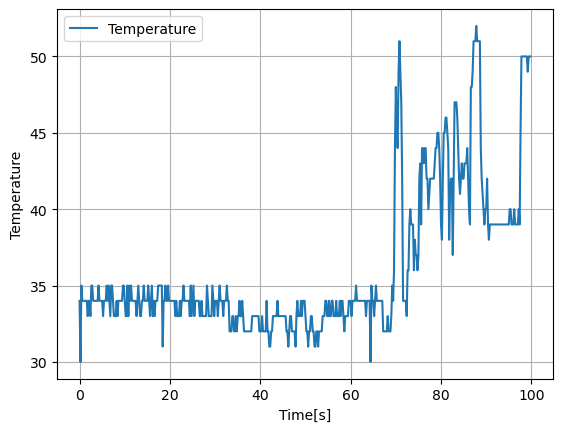

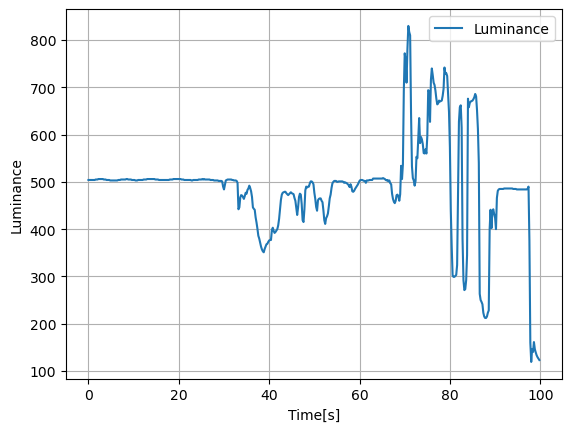

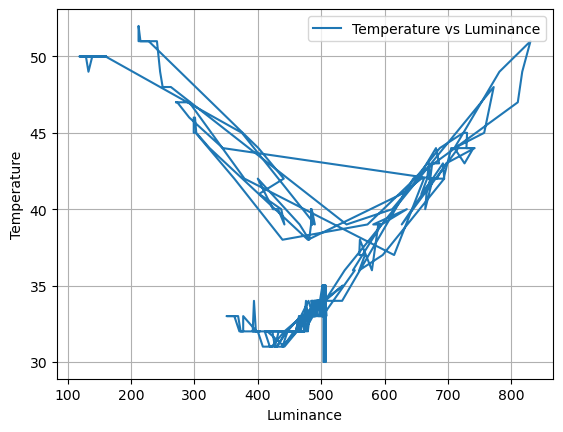

In [6]:
import matplotlib.pyplot as plt

# Create a time column
df['Time[s]'] = df.index * 0.2

# Plot temperature vs time
plt.plot(df['Time[s]'], df['Temperature'], label='Temperature')
plt.xlabel('Time[s]')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

# Plot luminance vs time
plt.plot(df['Time[s]'], df['Luminance'], label='Luminance')
plt.xlabel('Time[s]')
plt.ylabel('Luminance')
plt.legend()
plt.grid()
plt.show()

# Plot temperature vs luminance
plt.plot(df['Luminance'], df['Temperature'], label='Temperature vs Luminance')
plt.xlabel('Luminance')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

## 2) Databases

For the databases part of this assignment, you will use the mimic-iii database from the laboratory session. Start by adding a few new tables to the database, using the SQL files included in the assignment's files. Open PGAdmin and connect to your mimic-iii database. **To properly load these tables, load the following files exactly and by the order presented.**

1) Run demographic.sql

2) Run lab_firstday.sql

You will now have to answer a few SQL questions.

**1.** Open the connection to your mimic-iii database. If you want, you can delete your credentials before submitting the assignment, but if you do so, please run the notebook first, for the results to be displayed.

In [7]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt

conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    user='postgres',
                    password='password',
                    port=5432)

#Create a cursor object using the cursor() method
cursor = conn.cursor()

#Execute a SQL function using the execute() method
cursor.execute("select version()")

# Fetch a single row using fetchone() method
data = cursor.fetchone()
print("Connection established to: ", data)

Connection established to:  ('PostgreSQL 15.1, compiled by Visual C++ build 1914, 64-bit',)


In [8]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt

**2.** Create a function that receives an SQL query and automatically opens a cursor, queries the database, extracts the columns, creates a pandas database, and closes the connections.

In [9]:
def SQL_query(query):
    conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    user='postgres',
                    password='password',
                    port=5432)
    cursor = conn.cursor()
    cursor.execute(query)
    colnames = [desc[0] for desc in cursor.description]
    data = cursor.fetchall()
    conn.close()
    return pd.DataFrame(data, columns = colnames)



**3.** Query the table admissions filtering for admission type as emergency and insurance as private.

In [10]:
query_emerg_priv =  "SELECT * FROM public.admissions " +\
"WHERE admission_type = 'EMERGENCY' " +\
"AND insurance = 'Private'"

SQL_query(query_emerg_priv)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaT,NaT,HEPATITIS B,1,1
1,12317,10067,160442,2130-10-06 01:34:00,2130-10-06 02:29:00,2130-10-06 02:29:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,UNOBTAINABLE,None,OTHER,2130-10-06 00:12:00,2130-10-06 01:30:00,S/P MOTORCYCLE ACCIDENT,1,1
2,12339,10088,149044,2107-05-12 18:00:00,2107-05-18 13:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,UNOBTAINABLE,UNKNOWN (DEFAULT),WHITE,NaT,NaT,UROSEPSIS,0,1
3,12341,10090,176805,2124-01-12 14:26:00,2124-01-14 19:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2124-01-12 11:56:00,2124-01-12 16:09:00,OVERDOSE,0,1
4,12349,10098,180685,2170-12-02 23:24:00,2170-12-03 15:55:00,2170-12-03 15:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,UNOBTAINABLE,None,OTHER,2170-12-02 22:45:00,2170-12-03 00:56:00,STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES,1,1
5,12357,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,None,CATHOLIC,MARRIED,WHITE,2161-09-14 14:45:00,2161-09-15 01:30:00,HEADACHE,0,1
6,12368,10117,187023,2138-06-05 17:23:00,2138-06-11 10:16:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,2138-06-05 11:42:00,2138-06-05 21:20:00,FEVER,0,1
7,12369,10117,105150,2138-11-09 18:08:00,2138-11-18 23:13:00,2138-11-18 23:13:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,2138-11-09 15:42:00,2138-11-09 20:42:00,FEVER,1,1
8,12381,10126,160445,2171-07-12 06:02:00,2171-08-16 12:00:00,2171-08-16 12:00:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,None,UNOBTAINABLE,SINGLE,WHITE,NaT,NaT,LIVER FAILURE,1,1
9,12382,10127,182839,2198-06-28 05:34:00,2198-07-20 14:56:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,None,NOT SPECIFIED,None,WHITE,2198-06-28 04:28:00,2198-06-28 05:52:00,S/P MOTOR VEHICLE ACCIDENT,0,1


**4.** Query the table admissions, filtering for the same conditions as the previous exercise (admission type as emergency and insurance as private). Join the "drgcodes" table on the admission ID. Display only the columns regarding the subject id, admission id, time of death, and description of the drug.

In [11]:
query_with_drgcodes = "SELECT * FROM public.admissions " +\
"LEFT JOIN public.drgcodes " +\
"ON public.admissions.subject_id = public.drgcodes.subject_id " +\
"AND public.admissions.hadm_id = public.drgcodes.hadm_id " +\
"WHERE admission_type = 'EMERGENCY' " +\
"AND insurance = 'Private' "

SQL_query(query_with_drgcodes)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,hospital_expire_flag,has_chartevents_data,row_id,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,12385,10130,156668,2161-01-30 16:26:00,2161-02-19 14:05:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,...,0,1,1338,10130,156668,HCFA,148,MAJOR SMALL & LARGE BOWEL PROCEDURES WITH COMP...,NaN,NaN
1,12368,10117,187023,2138-06-05 17:23:00,2138-06-11 10:16:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,...,0,1,2599,10117,187023,HCFA,185,DENTAL & ORAL DIS EXCEPT EXTRACTIONS & RESTORA...,NaN,NaN
2,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,...,1,1,3020,10011,105331,HCFA,205,"DISORDERS OF LIVER EXCEPT MALIGNANCY, CIRRHOSI...",NaN,NaN
3,12369,10117,105150,2138-11-09 18:08:00,2138-11-18 23:13:00,2138-11-18 23:13:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,1,1,7125,10117,105150,HCFA,089,SIMPLE PNEUMONIA & PLEURISY AGE >17 WITH COMPL...,NaN,NaN
4,12357,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,...,0,1,13960,10106,133283,HCFA,020,NERVOUS SYSTEM INFECTION EXCEPT VIRAL MENINGITIS,NaN,NaN
5,12381,10126,160445,2171-07-12 06:02:00,2171-08-16 12:00:00,2171-08-16 12:00:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,...,1,1,18487,10126,160445,APR,0014,Liver Transplant,4.0,4.0
6,12381,10126,160445,2171-07-12 06:02:00,2171-08-16 12:00:00,2171-08-16 12:00:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,...,1,1,18488,10126,160445,HCFA,541,ECMO OR TRACHEOSTOMY WITH MECHANICAL VENTILATI...,NaN,NaN
7,12339,10088,149044,2107-05-12 18:00:00,2107-05-18 13:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Private,...,0,1,19734,10088,149044,HCFA,416,SEPTICEMIA AGE >17,NaN,NaN
8,12349,10098,180685,2170-12-02 23:24:00,2170-12-03 15:55:00,2170-12-03 15:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,1,1,22247,10098,180685,APR,0203,Craniotomy for Trauma,3.0,4.0
9,12349,10098,180685,2170-12-02 23:24:00,2170-12-03 15:55:00,2170-12-03 15:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,...,1,1,22248,10098,180685,HCFA,001,"CRANIOTOMY AGE >17 WITH COMPLICATIONS, COMORBI...",NaN,NaN


**5.1.** Obtain the dataset for this problem, by running the SQL query below.

In [15]:
query = "SELECT pivoted_lab.*," +\
                "gender as gender," +\
                "admission_age," +\
                "ethnicity_grouped as eth_grp," +\
                "hospital_expire_flag," +\
                "los_icu " +\
        "FROM demographics " +\
        "LEFT JOIN pivoted_lab " +\
        "ON demographics.icustay_id = pivoted_lab.icustay_id " +\
        "WHERE first_icu_stay = true"

df = SQL_query(query)
print(df)

     subject_id  hadm_id  icustay_id  aniongap_min  aniongap_max  albumin_min  \
0         10006   142345      206504          12.0          20.0          2.7   
1         10011   105331      232110          12.0          12.0          2.6   
2         10013   165520      264446          13.0          13.0          NaN   
3         10017   199207      204881          13.0          13.0          2.8   
4         10019   177759      228977          20.0          46.0          3.2   
..          ...      ...         ...           ...           ...          ...   
123       44083   198330      286428          16.0          16.0          NaN   
124       44154   174245      217724          15.0          15.0          NaN   
125       44212   163189      239396          15.0          21.0          2.9   
126       44222   192189      238186          11.0          15.0          NaN   
127       44228   103379      217992          12.0          18.0          2.2   

     albumin_max  bands_min

**5.2.** Close the connection to your SQL server.

In [17]:
conn.close() #Connection is already closed due to 'SQL_query'-function

**5.3.** Prepare your dataset:

* Drop the ID columns of subject, admission and ICU stay.
* Drop columns with at least one NA value.
* Encode the categorical columns, the ethnicity and gender ('eth_grp', 'gender'). *Suggestion: use pd.get_dummies*
* Consider the column 'hospital_expire_flag' as the response and all remaining columns as the predictors.

In [16]:
# drop ID columns
df = df.drop(columns=['subject_id', 'hadm_id', 'icustay_id'])

# drop columns with NA values
df = df.dropna(axis=1)

# encode categorical columns
df = pd.get_dummies(df, columns=['eth_grp', 'gender'])

# separate response and predictors
response = df['hospital_expire_flag']
predictors = df.drop(columns='hospital_expire_flag')

df

,bicarbonate_min,bicarbonate_max,creatinine_min,creatinine_max,chloride_min,chloride_max,glucose_min,glucose_max,hematocrit_min,hematocrit_max,...,los_icu,eth_grp_asian,eth_grp_black,eth_grp_hispanic,eth_grp_native,eth_grp_other,eth_grp_unknown,eth_grp_white,gender_F,gender_M
0,29.0,31.0,3.0,3.5,96.0,100.0,84.0,217.0,36.9,42.4,...,1.0,0,1,0,0,0,0,0,1,0
1,23.0,23.0,0.7,0.7,107.0,107.0,79.0,79.0,33.9,34.0,...,13.0,0,0,0,0,0,1,0,1,0
2,29.0,29.0,1.7,1.7,98.0,100.0,134.0,165.0,28.1,29.2,...,2.0,0,0,0,0,0,1,0,1,0
3,29.0,29.0,0.3,0.3,100.0,100.0,137.0,137.0,27.5,27.5,...,2.0,0,0,0,0,0,0,1,1,0
4,10.0,18.0,4.0,7.2,83.0,104.0,80.0,360.0,30.6,36.0,...,1.0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,21.0,21.0,0.7,0.7,108.0,108.0,151.0,151.0,26.0,29.0,...,3.0,0,0,0,0,0,0,1,0,1
124,19.0,19.0,0.9,0.9,107.0,113.0,164.0,177.0,40.8,41.8,...,0.0,0,0,0,0,0,0,1,0,1
125,18.0,23.0,3.0,4.8,108.0,115.0,99.0,122.0,23.8,25.9,...,31.0,0,1,0,0,0,0,0,1,0
126,22.0,27.0,1.2,1.7,100.0,101.0,56.0,268.0,37.8,39.0,...,1.0,0,0,0,0,0,0,1,0,1


**6.** Fit the following tree-based classifiers to the dataset. For each method:

* Perform k-fold cross validation to evaluate the models. Consider 10 folds.

* Plot the ROC curves for each fold, along with the mean ROC curve.

* Calculate the mean AUC.

**a.** Decision tree.

C:\Users\Manus\anaconda3\envs\advanced-automation\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Manus\anaconda3\envs\advanced-automation\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Manus\anaconda3\envs\advanced-automation\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is dep

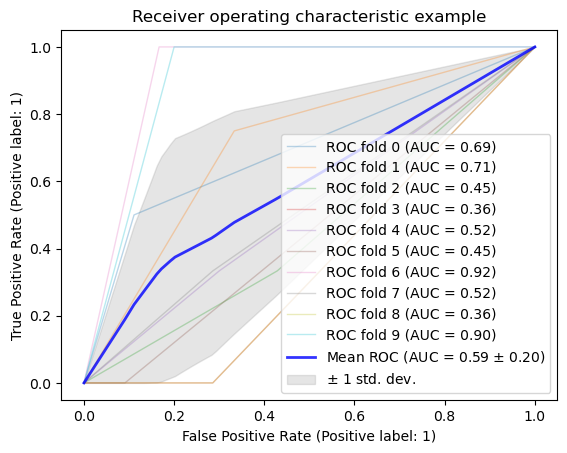

Mean AUC: 0.59


In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import roc_curve, auc, plot_roc_curve

# Since the process is similar for the different classifiers, make it a method.
def fit_model(tree_based_classifier):
  # fit a decision tree model to the data
  model = tree_based_classifier
  model.fit(predictors, response)

  # perform k-fold cross validation with 10 folds
  kf = KFold(n_splits=10)
  y_pred = cross_val_predict(model, predictors, response, cv=kf)

  # plot ROC curves for each fold
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  fig, ax = plt.subplots()
  for i, (train, test) in enumerate(kf.split(predictors)):
      model.fit(predictors.iloc[train], response.iloc[train])
      viz = plot_roc_curve(model, predictors.iloc[test], response.iloc[test],
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  # plot mean ROC curve
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example")
  ax.legend(loc="lower right")
  plt.show()

  # calculate mean AUC
  mean_auc = np.mean(aucs)
  print("Mean AUC: {:.2f}".format(mean_auc))

fit_model(DecisionTreeClassifier())

**b.** Random forest

C:\Users\Manus\anaconda3\envs\advanced-automation\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Manus\anaconda3\envs\advanced-automation\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Manus\anaconda3\envs\advanced-automation\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is dep

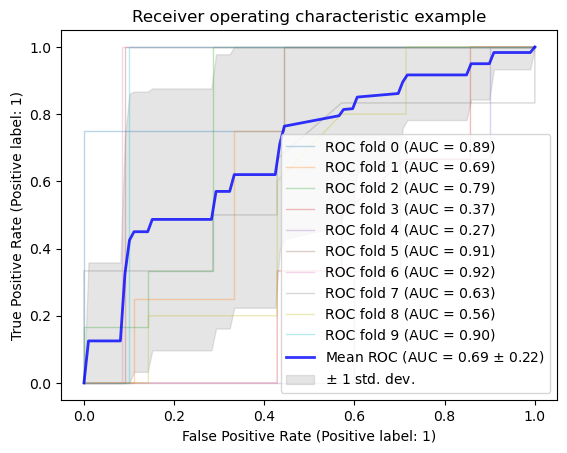

Mean AUC: 0.69


In [20]:
from sklearn.ensemble import RandomForestClassifier

fit_model(RandomForestClassifier())


**c.** Gradient Boosting

C:\Users\Manus\anaconda3\envs\advanced-automation\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Manus\anaconda3\envs\advanced-automation\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Manus\anaconda3\envs\advanced-automation\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is dep

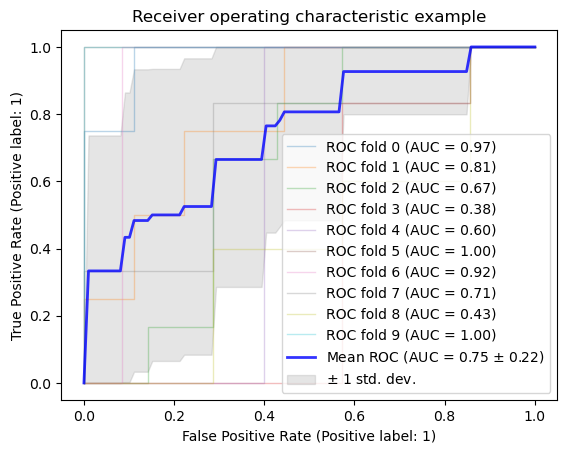

Mean AUC: 0.75


In [21]:
from sklearn.ensemble import GradientBoostingClassifier

fit_model(GradientBoostingClassifier())

**7.1.** Perform a grid search cross-validation on the Gradient boosting methods, changing the value of the learning rate (0.01 to 0.5) and the number of estimators (50-500). Consider the mean AUC of the folds as the performance measure.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# define the parameter values that should be searched
learning_rate_range = [0.01, 0.1, 0.5]
n_estimators_range = [50, 100, 250, 500]

# create a parameter grid
param_grid = dict(learning_rate=learning_rate_range, n_estimators=n_estimators_range)

# instantiate the grid
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10, scoring='roc_auc')

# fit the grid with data
grid.fit(predictors, response)

# view the results
print("Best parameters: {}".format(grid.best_params_))
print("Best mean AUC: {:.2f}".format(grid.best_score_))


Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Best mean AUC: 0.77


**7.2.** Plot a scatterplot of the learning rate versus the number of estimators, with the mean AUC as the color gradient.

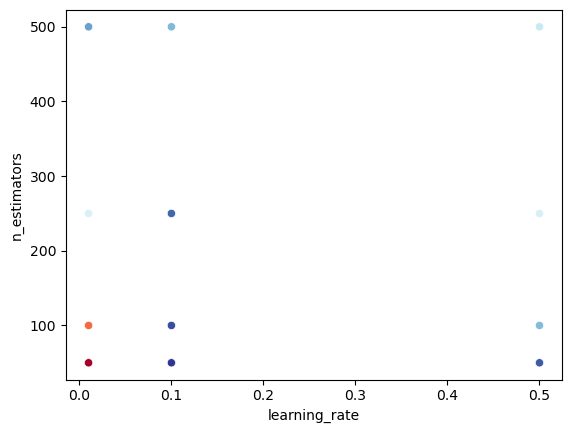

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# extract the results from the grid search
results = grid.cv_results_

# create a dataframe with the parameters and mean AUC
df = pd.DataFrame(dict(learning_rate=results['param_learning_rate'],
                       n_estimators=results['param_n_estimators'],
                       mean_auc=results['mean_test_score']))

# plot the data
sns.scatterplot(x='learning_rate', y='n_estimators', hue='mean_auc', data=df,
                palette='RdYlBu', legend=False)


# show the plot
plt.show()


**8.1.** Perform forward stepwise selection on the dataset. Use the best parameters of the gradient boosting method obtained in **7.1.**.

Iterating for 1/31 features.
Iterating for 2/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 3/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 4/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 5/31 features.
Iterating for 6/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 7/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 8/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 9/31 features.
Iterating for 10/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 11/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 12/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 13/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 14/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 15/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 16/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 17/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 18/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 19/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 20/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 21/31 features.
Iterating for 22/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 23/31 features.
Iterating for 24/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 25/31 features.
Iterating for 26/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)


Iterating for 27/31 features.
Iterating for 28/31 features.


C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_best_forward = models_best_forward.append(models_best_forward_iter)
C:\Users\Manus\AppData\Local\Temp\ipykernel_19604\1939798041.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

Iterating for 29/31 features.
Iterating for 30/31 features.
Iterating for 31/31 features.


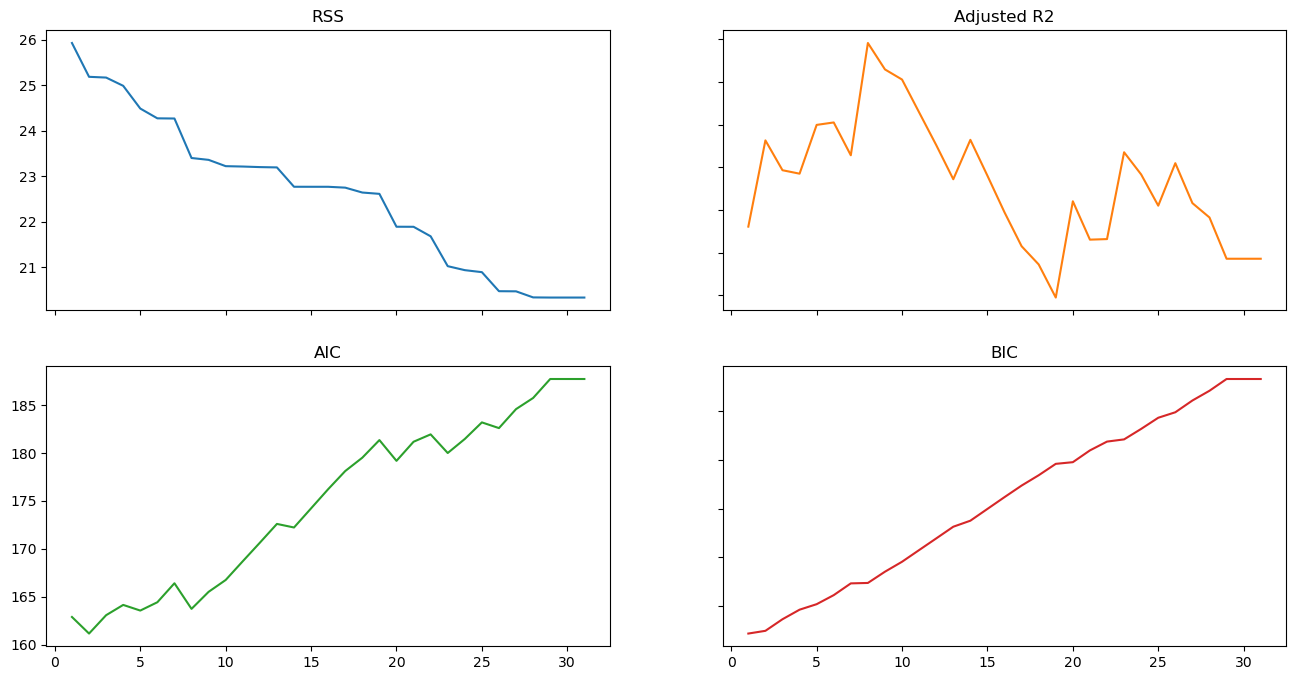

1 :  bicarbonate_min
2 :   bicarbonate_max
3 :   creatinine_min
4 :   creatinine_max
5 :   chloride_min
6 :   chloride_max
7 :   glucose_min
8 :   glucose_max
9 :   hematocrit_min
10 :   hematocrit_max
11 :   platelet_min
12 :   platelet_max
13 :   potassium_min
14 :   potassium_max
15 :   sodium_min
16 :   sodium_max
17 :   bun_min
18 :   bun_max
19 :   wbc_min
20 :   wbc_max
21 :   admission_age
22 :   los_icu
23 :   eth_grp_asian
24 :   eth_grp_black
25 :   eth_grp_hispanic
26 :   eth_grp_native
27 :   eth_grp_other
28 :   eth_grp_unknown
29 :   gender_M


In [25]:
import statsmodels.api as sm
models_best_forward = pd.DataFrame(columns=['k', "features", "rsq", "rss", "adjr2", 'aic', 'bic'])

predictors_2 = []

for k in range(1, predictors.shape[1] + 1):
    print('Iterating for {}/{} features.'.format(k, predictors.shape[1]))
    remaining_predictors = [p for p in predictors.columns if p not in predictors_2]
    models_best_forward_iter = pd.DataFrame(columns=['feature_single', "features", "rsq", "rss", "adjr2", 'aic', 'bic'])
    count = 0
    for p in remaining_predictors:
        combo = predictors_2 + [p]
        iter_X = predictors[combo]
        model = sm.OLS(response,sm.add_constant(iter_X)).fit()
        
    #        y_pred = regr.predict(iter_X)
        iter_vals = [
            p,
            ', '.join(combo),
            model.rsquared,      # rsq
            sum(model.resid**2), # rss
            model.rsquared_adj,  # adjr2
            model.aic,           # aic
            model.bic            # bic
        ]
        models_best_forward_iter.loc[count] = pd.DataFrame(
            [iter_vals],
            columns = ['feature_single', "features", "rsq", "rss", "adjr2", 'aic', 'bic']
        ).iloc[0,]
        count += 1

    predictors_2.append(models_best_forward_iter.loc[models_best_forward_iter['rsq'][0].argmax()]['feature_single'])
    
    models_best_forward_iter = models_best_forward_iter.rename(columns={"feature_single": "k"})
    models_best_forward_iter['k'] = k
    models_best_forward = models_best_forward.append(models_best_forward_iter)


models_best3 = models_best_forward.copy()
models_best3 = models_best3[models_best3['rsq'] == models_best3.groupby('k')['rsq'].transform('max')]
#models_best3 = models_best3.sort_values(by = 'k')

plt.rcParams["figure.figsize"] = (16,8)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(models_best3.k, models_best3.rss)
axs[0, 0].set_title('RSS')
axs[0, 1].plot(models_best3.k, models_best3.adjr2, 'tab:orange')
axs[0, 1].set_title('Adjusted R2')
axs[1, 0].plot(models_best3.k, models_best3.aic, 'tab:green')
axs[1, 0].set_title('AIC')
axs[1, 1].plot(models_best3.k, models_best3.bic, 'tab:red')
axs[1, 1].set_title('BIC')

for ax in axs.flat:
    ax.label_outer()

plt.show()

a=1
for i in models_best3.iloc[28]['features'].split(','):
   print(a,': ', i) 
   a = a+1

**8.2.** Compare and comment the results from **8.1.** with the features importance obtained through the grid search of queastion **7.1.**.

## 3) Theoretical Questions

**1.** Consider a dataset where best subset, forward stepwise and backward stepwise selection will be performed. For each of the 3 approaches, we obtain $p+1$ models, $p$ being the total number of predictors. This means that each approach has a model with 0 predictors, one with 1 predictor, one with 2 predictor, up until one model with $p$ predictors. Answer and justify the following questions:

**a)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest training RSS?

Best subset model has the lowest training residual sum of squares since it uses every possible combination of predictors. At a large number of predictors the method has a good chance at selecting models that fit the traing data better than with the other methods. However, it is very likely that best subset selection leads to over fitting.

**b)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest test RSS?

Forward stepwise and backward stepwise selction reduce the number of models considered compared with best subset selection. All methods can provide the smallest test RSS. Best subset selction tend to have a higher risk of over fitting than Forward stepwise and backward stepwise selction.

**c)** Evaluate the following statements with *true* or *false*. Justify your answers.

    i. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.

True: By adding a predictor that gives a lower RSS or higher R^2 value to the model it is a subset of the (k+1) model.

    ii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by backward stepwise selection.\

True: By removing the predictor that contributes least in the (k+1) model, you get a k-model which all predictors are a subset of (k+1) model.

    iii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.

False: The methods are not the same and thus they can select/remove different predictors each iteration.

    iv. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.

False: The methods are not the same and thus they can select/remove different predictors each iteration.

    v. The predictors in the k-variable model identified by best subset selection are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.

False: The best subset selction selcts the best predictors for each k-variable model. This means that (k+1) model are not dependent on k-variable model.

**2.** Ridge regression tends to give similar coefficient values to correlated variables, whereas lasso regression may give substantially different coefficients to correlated variables. This questions explores this property in a simplified setting.

Suppose that $n=2$, $p=2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Moreover, suppose that $y_1 + y_2 = 0$ and $x_{11} + x_{21} = 0$ and $x_{12} + x_{22} = 0$, meaning that the estimate for the intercept in a least squares, ridge regression, or lasso regression is zero: $\hat{\beta} = 0$.

**a)** Write the ridge regression optimization problem in this setting.

Answer:
$$(y1−\hat{\beta}_1x_1−\hat{\beta}_2x_1)^2+(y_2−\hat{\beta}_1x_2−\hat{\beta}_2x_2)^2+λ(\hat{\beta}_1^2+\hat{\beta}_2^2)$$

**b)** Prove that in this setting, the ridge regression coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.

Answer:

We take the derivatives of the above expression with respect to $\hat{\beta}_1 = \hat{\beta}_2$ and set them equal to 0 obtaining this 2 ecuations:

$$\hat{\beta}_1(x_1^2+x_2^2+λ)+\hat{\beta}_2(x_1^2+x_2^2)=y_1x_1+y_2x_2$$

$$\hat{\beta}_1(x_1^2+x_2^2)+\hat{\beta}_2(x_1^2+x_2^2+λ)=y_1x_1+y_2x_2$$

Then we get $\hat{\beta}_1 = \hat{\beta}_2$

**c)** Write the lasso regression optimization problem in this setting.

Answer:

$$(y_1−\hat{\beta}_1x_1−\hat{\beta}_2x_1)^2+(y_2−\hat{\beta}_1x_2−\hat{\beta}_2x_2)^2+λ(|\hat{\beta}_1|+|\hat{\beta}_2|)$$

**d)** Prove that in this setting, the lasso regression coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique, meaning that there are many possible solutions to the optimization problem in (c). Describe these solutions.

Answer:

By replacing the values mentioned above, we get the optimization problem:

$$2[b−a(\hat{\beta}_1+\hat{\beta}_2)^2]+λ(|\hat{\beta}_1|+|\hat{\beta}_2|)$$

Taking the derivates with respect to $\hat{\beta}_1$ and $\hat{\beta}_2$ we get:

$$4a[b−a(\hat{\beta}_1+\hat{\beta}_2)]=+/−λ$$

This means that its optimization problem has many possible solutions.

**3.** Draw an example of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions R1, R2,..., the cutpoints t1, t2,..., and so forth.

If you prefer you can draw it by hand or in any software and use a scan of it.

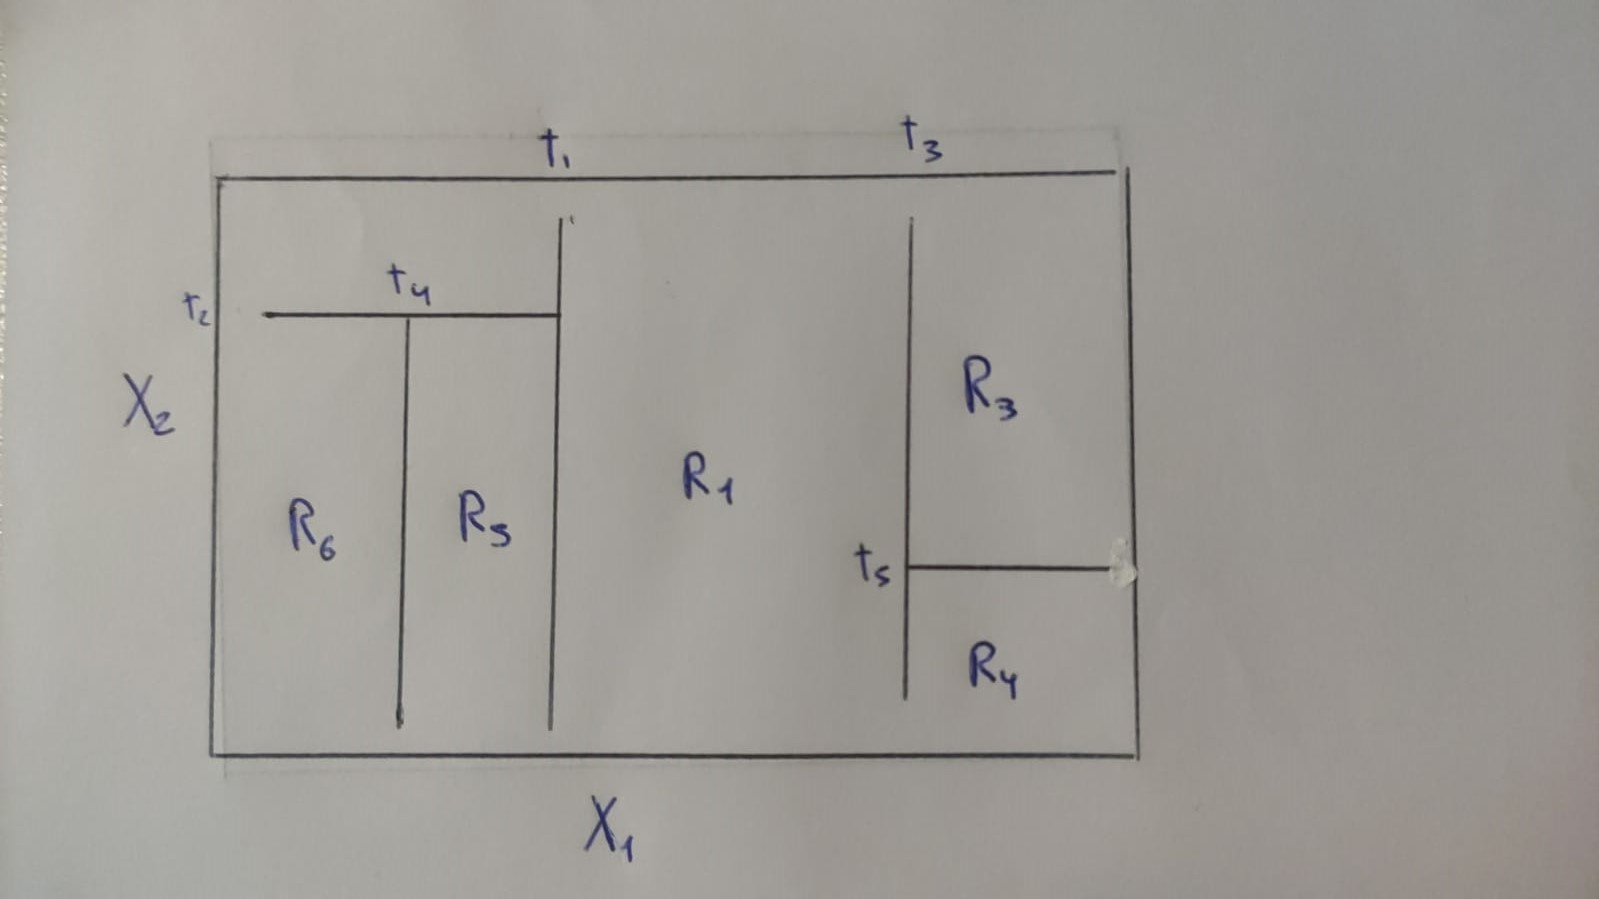



**4.** In 2 dimensions, a linear decision boundary takes the form $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$. Consider a nn-linear decision boundary:

**a)** Sketch the curve

$$(1 + X_1)^2 + (2 - X_2)^2 = 4$$

Additionally, indicate on your sketch the set of points that verify the condition

$$(1 + X_1)^2 + (2 - X_2)^2 > 4$$

and the condition

$$(1 + X_1)^2 + (2 - X_2)^2 \leq 4$$

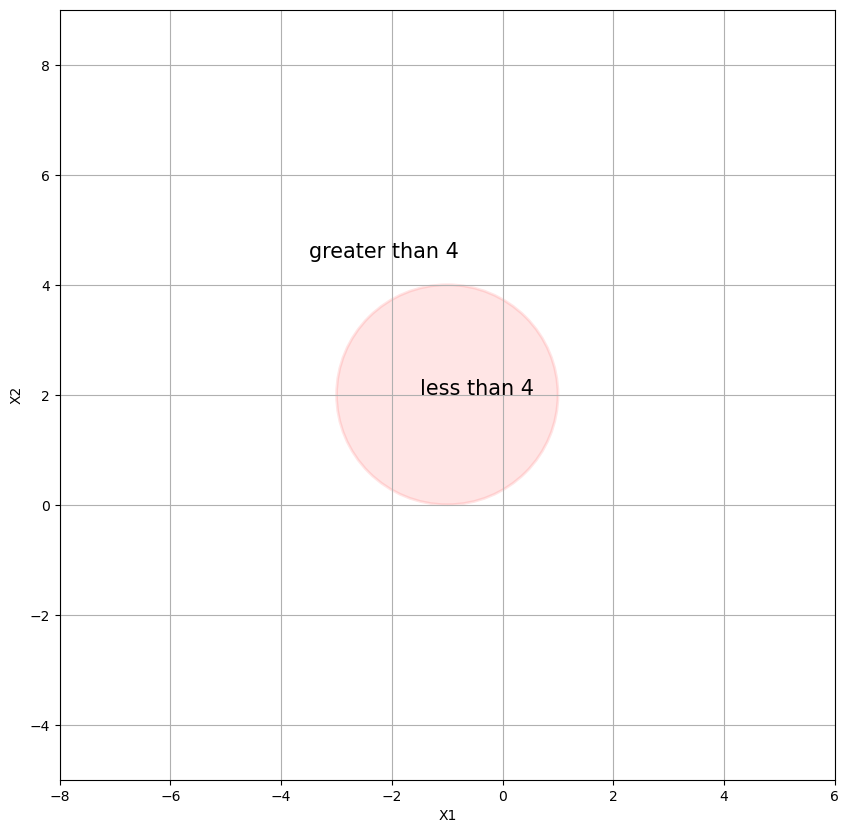

In [26]:
circle = plt.Circle((-1, 2), radius=2, facecolor='r', alpha=0.1, edgecolor='r', linewidth=2.0)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.add_artist(circle)
plt.text(-1.5, 2, "less than 4", fontdict={'color':'black', 'size':15})
plt.text(-3.5, 4.5, "greater than 4", fontdict={'color':'black', 'size':15})

ax.set_xlim(-8, 6)
ax.set_ylim(-5, 9)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()


**b)** Suppose that a classifier assigns an observation to the blue class if $(1 + X_1)^2 + (2 - X_2)^2 > 4$ and to the red class otherwise. To what class are the following observations classified? (0,0), (-1,1), (2,2), (3,8)

Answer:

For (0,0), we have 5>4 (blue class), for (−1,1), we have 1<4 (red class), for (2,2), we have 9>4 (blue class), for (3,8), we have 52>4 (blue class).

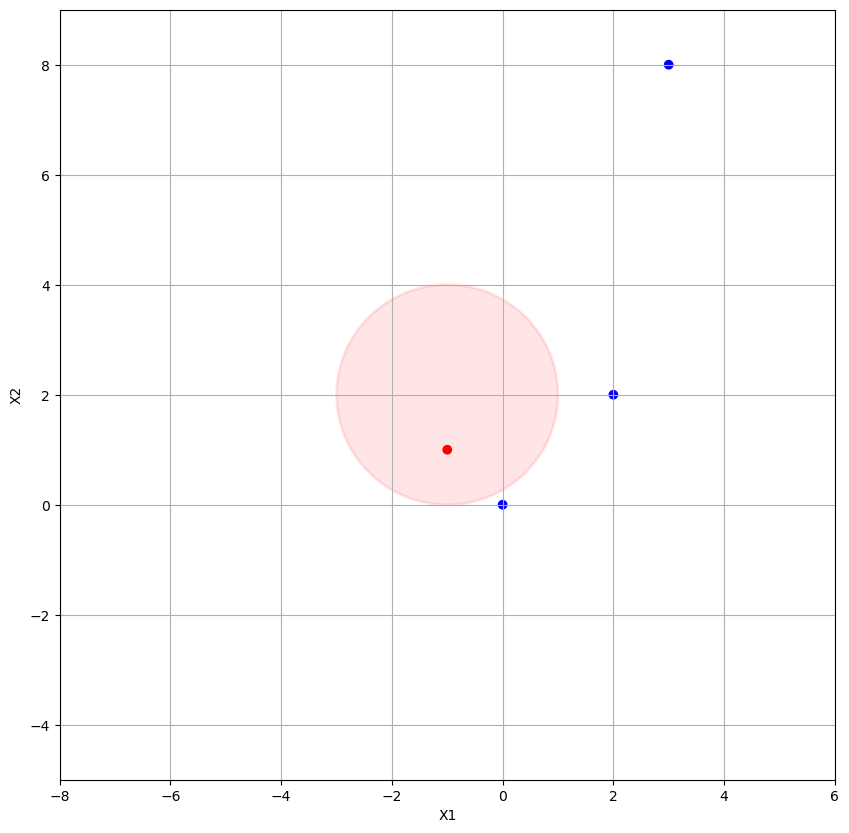

In [27]:
circle = plt.Circle((-1, 2), radius=2, facecolor='r', alpha=0.1, edgecolor='r', linewidth=2.0)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.add_artist(circle)
plt.scatter([0, -1, 2, 3], [0, 1, 2, 8], c=['b', 'r', 'b', 'b'])

ax.set_xlim(-8, 6)
ax.set_ylim(-5, 9)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.grid()
plt.show()

**c)** Prove that while the decision boundary in (b) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.

Answer:

We prove it expanding the equation of the decision boundary

$$(1 + X_1)^2 + (2 - X_2)^2 = 4$$

by:

$$X_1^2+X_2^2+2X_1−4X_2+1=0$$


# 4) Laboratory Questions

What are the advantages and disadvantages of relational dabases versus graph databases, and when should one type be preferred over the other?

The main difference is that, in graph databases, relationships are stored at the level of each record, whereas in relational databases, the structure is defined at a higher level (the table definitions). This has important implications. 

Relational databases are much faster when dealing with large numbers of records. In a graph database, each record in the query must be examined individually to determine the structure of the data, whereas in a relational database, this is known in advance.

 Relational databases take up less storage space because they don't need to store all those relationships. Storing all relationships at a single record level only makes sense if the relationships are very different; otherwise you'll be duplicating the same thing over and over. This makes graph databases well suited for irregular, complex structures.
 
But in the real world, most databases require regular, relatively simple structures. Hence, relational databases dominate.